## Convolutional Neural Network with CIFAR-10 dataset
(based on a tutorial by Python Engineer in Youtube)

CIFAR10: a popular dataset with 10 different classes.

Available directly in Pytorch.


CNNs mainly works on images, with conv layers, optional activations function layers, pooling layers learning the features from images and in the end one or more fully connected layers for the actual classification.

We put filters on images and multiply and sum numbers putting the result on resulting image.
=> resulting image may have smaller size so we add paddings (not added here)


Max pooling => max subregions into the output image. (reduces the number of parameter that machine must learn and helps to avoid overfitting by providing an abstracted form of the input.)

In [25]:
#importing libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
#hyperparameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001



In [48]:
#Transformation

#dataset has PILImage images of range [0,1]
#we transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [49]:
#datasets and dataloaders
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [50]:
classes = ('plane', 'car', 'bird','cat','deer', 'dog','frog','horse', 'ship', 'truck')

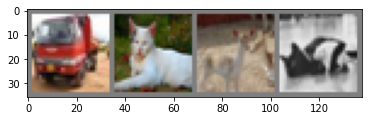

In [51]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
# np.array([image])/255.
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [52]:
#implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        
        #conv,relu,maxpooling,conv,relu,maxpooling,FC1,FC2,FC3,softmax,crossentropy no need to softmax here
        # now the dim is 4*3*32*32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        
        # now the dim is 4*6*28*28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #after each operation we shift 2 pixels to the right stride = 2
        
        # now the dim is 4*6*14*14
        self.conv2 = nn.Conv2d(in_channels=6,     #input_channel_size here is equal to the last output channel size
                              out_channels= 16, kernel_size= 5)
       
        # now the dim is 4*16*10*10
        #we need a pooling here
        
        # now the dim is 4*16*5*5
        self.fc1 = nn.Linear(16*5*5, 120)  # 16*5*5
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        #activation function won't change the size
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5) # -1 Pytorch will change it for us
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        #no activation at the end
        
        return x
    


In [53]:
model = ConvNet().to(device)

In [54]:
criterion = nn.CrossEntropyLoss()  #multiclass classification
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [55]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #origin shape: [4,3,32,32] = 4,3, 1024
        #input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        #forwardpass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%2000 == 0:
            print(f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}')

print('Finished Training')
    

epoch 1/ 5, step 2000/12500,loss = 2.3023
epoch 1/ 5, step 4000/12500,loss = 2.2799
epoch 1/ 5, step 6000/12500,loss = 2.2691
epoch 1/ 5, step 8000/12500,loss = 2.1825
epoch 1/ 5, step 10000/12500,loss = 1.9277
epoch 1/ 5, step 12000/12500,loss = 1.8118
epoch 2/ 5, step 2000/12500,loss = 1.8898
epoch 2/ 5, step 4000/12500,loss = 2.1341
epoch 2/ 5, step 6000/12500,loss = 1.7124
epoch 2/ 5, step 8000/12500,loss = 1.4745
epoch 2/ 5, step 10000/12500,loss = 1.2598
epoch 2/ 5, step 12000/12500,loss = 1.4092
epoch 3/ 5, step 2000/12500,loss = 1.4621
epoch 3/ 5, step 4000/12500,loss = 1.9472
epoch 3/ 5, step 6000/12500,loss = 1.3437
epoch 3/ 5, step 8000/12500,loss = 1.3614
epoch 3/ 5, step 10000/12500,loss = 1.6075
epoch 3/ 5, step 12000/12500,loss = 0.9500
epoch 4/ 5, step 2000/12500,loss = 1.2003
epoch 4/ 5, step 4000/12500,loss = 1.8000
epoch 4/ 5, step 6000/12500,loss = 3.2893
epoch 4/ 5, step 8000/12500,loss = 1.8892
epoch 4/ 5, step 10000/12500,loss = 0.7054
epoch 4/ 5, step 12000/1250

In [56]:
#evaluate

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        #we don't need backpropagation, loss calculations etc here in test.
        
        #max returns (values, index)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
            
    acc = 100.0 * n_correct / n_samples
    
    print(f'accuracy of the network:{acc}%')
    
    for i in range(10):
        acci = 100.0 * n_class_correct[i] / n_class_samples[i]
    
        print(f'accuracy of the {classes[i]}:{acci}%')

accuracy of the network:50.27%
accuracy of the plane:56.1%
accuracy of the car:55.1%
accuracy of the bird:46.6%
accuracy of the cat:39.6%
accuracy of the deer:18.3%
accuracy of the dog:50.9%
accuracy of the frog:57.8%
accuracy of the horse:58.2%
accuracy of the ship:69.8%
accuracy of the truck:50.3%


In [57]:
# we must try with more epochs.